In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  5 12:59:44 2021

@author: LK
"""


import bt
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 DEMA_Crossover
-------------------  ----------------
Start                2018-12-31
End                  2021-06-08
Risk-free rate       0.00%

Total Return         490.38%
Daily Sharpe         1.20
Daily Sortino        2.11
CAGR                 107.24%
Max Drawdown         -38.02%
Calmar Ratio         2.82

MTD                  13.93%
3m                   29.68%
6m                   268.73%
YTD                  133.32%
1Y                   351.41%
3Y (ann.)            107.24%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  107.24%

Daily Sharpe         1.20
Daily Sortino        2.11
Daily Mean (ann.)    65.04%
Daily Vol (ann.)     54.20%
Daily Skew           1.42
Daily Kurt           18.97
Best Day             37.10%
Worst Day            -18.22%

Monthly Sharpe       1.46
Monthly Sortino      3.94
Monthly Mean (ann.)  89.35%
Monthly Vol (ann.)   61.11%
Monthly Skew         0.69
Monthly Kurt         0.56
Best Month           47.57%
Worst Month  

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


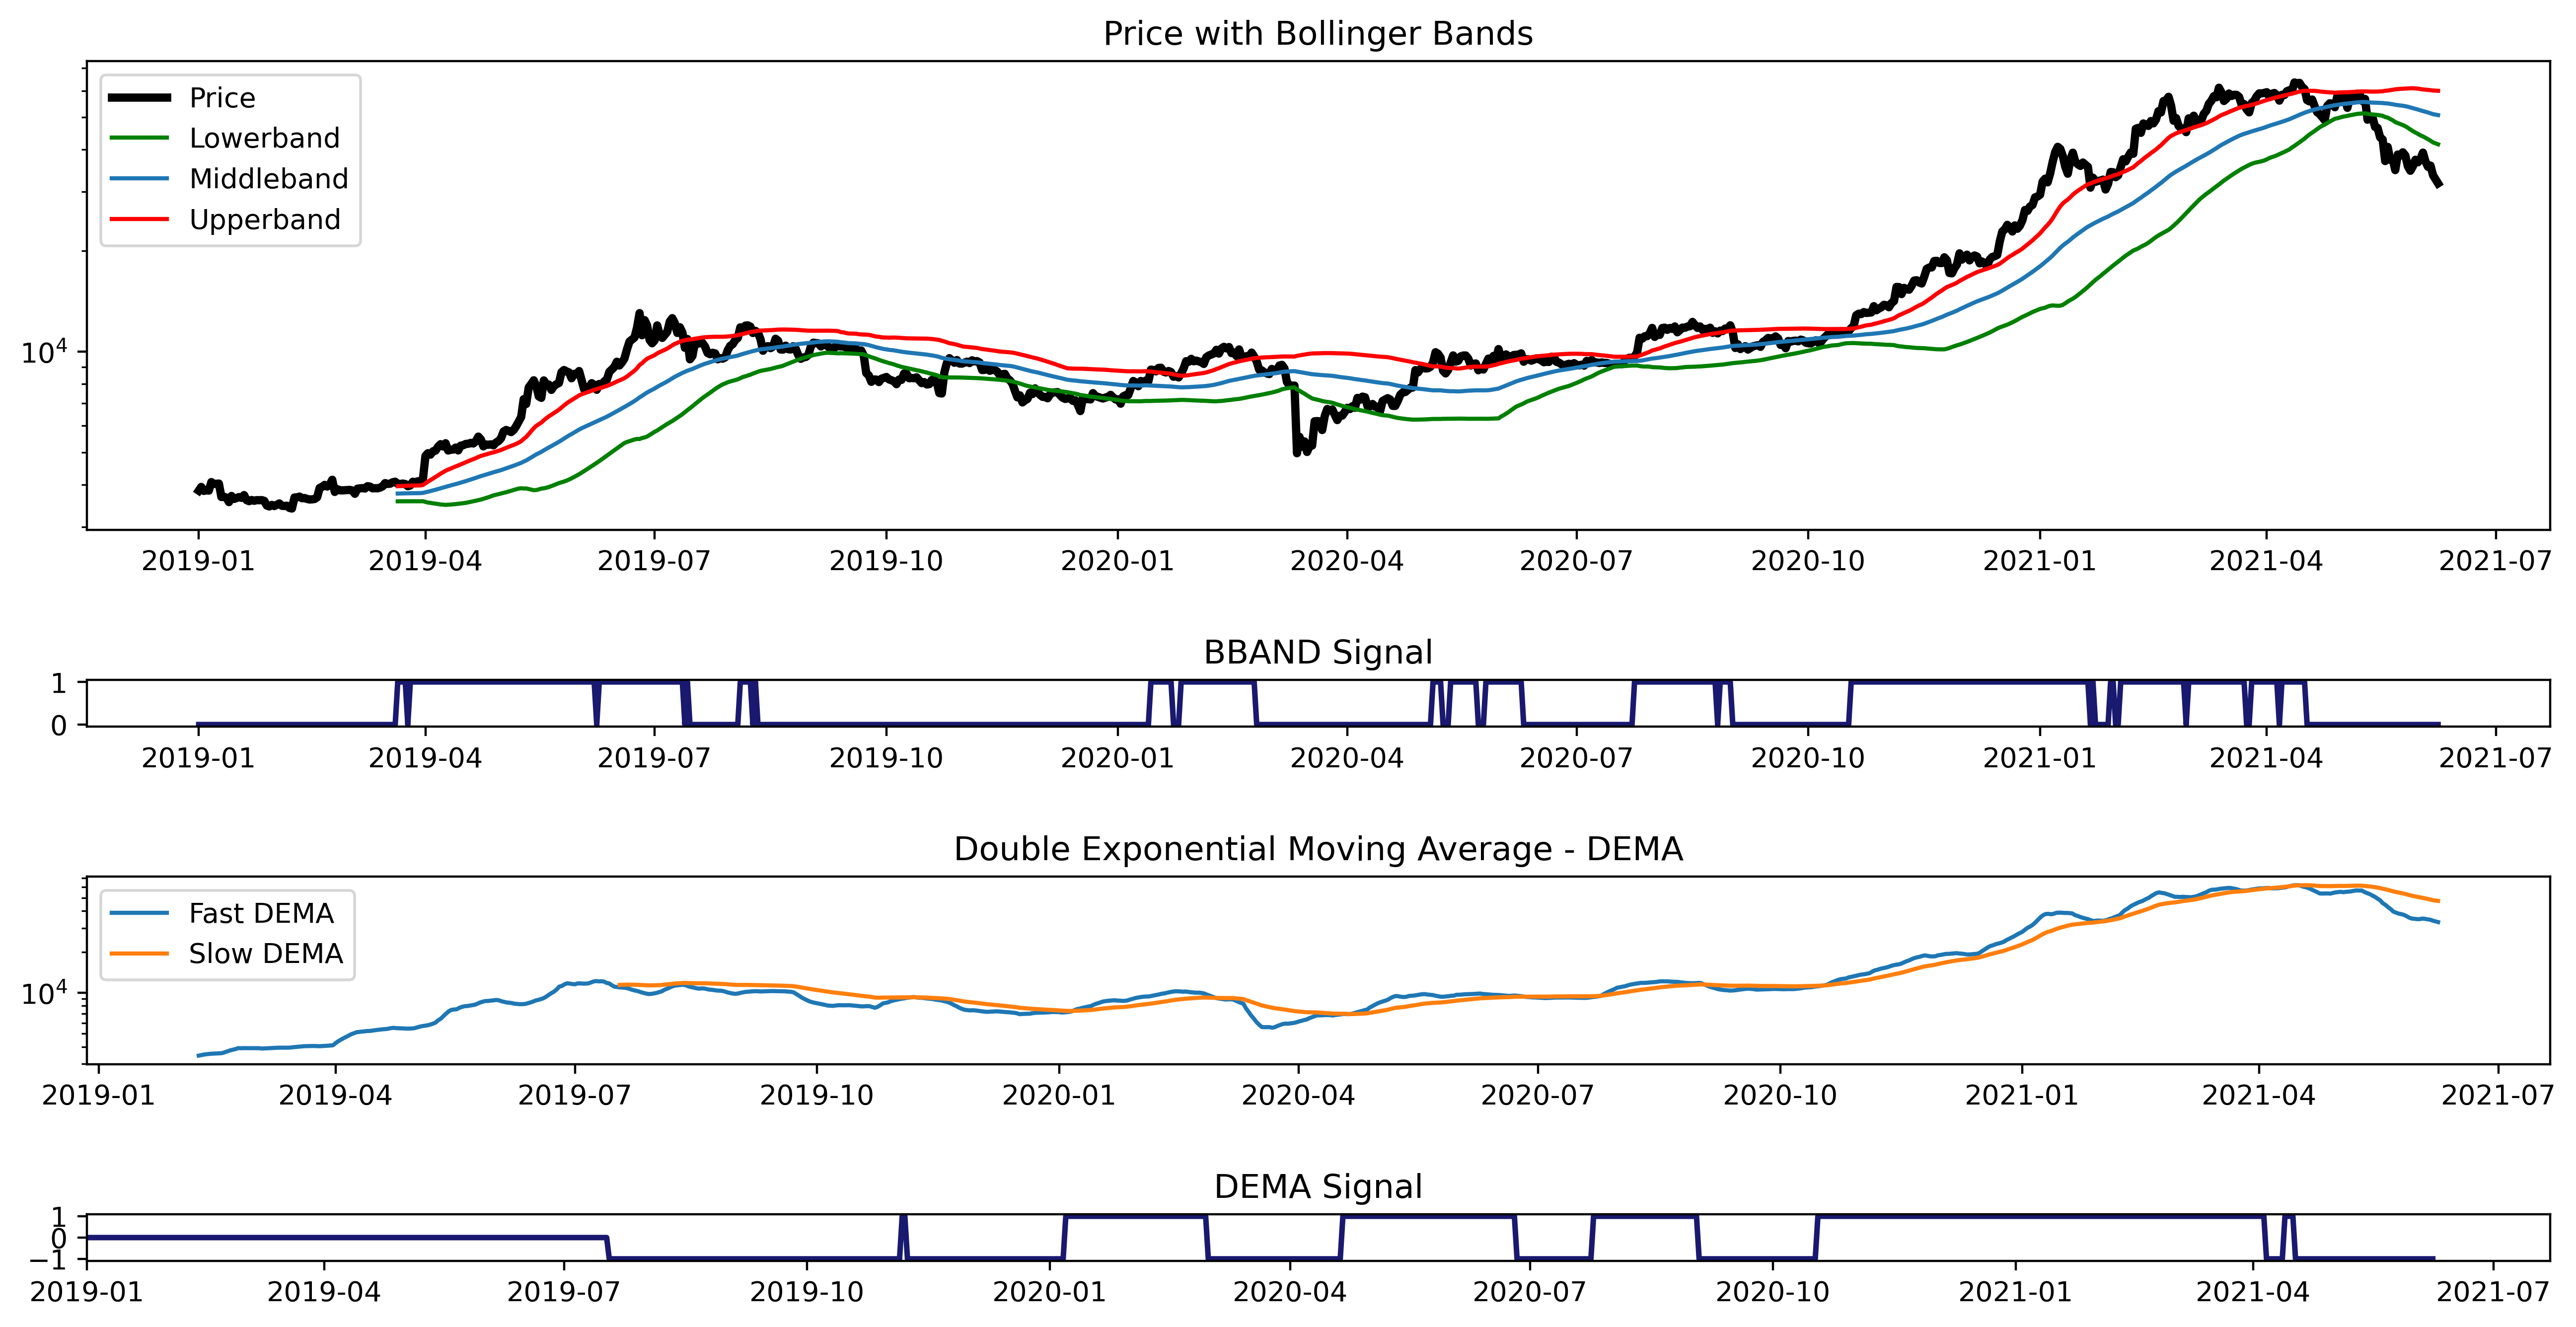

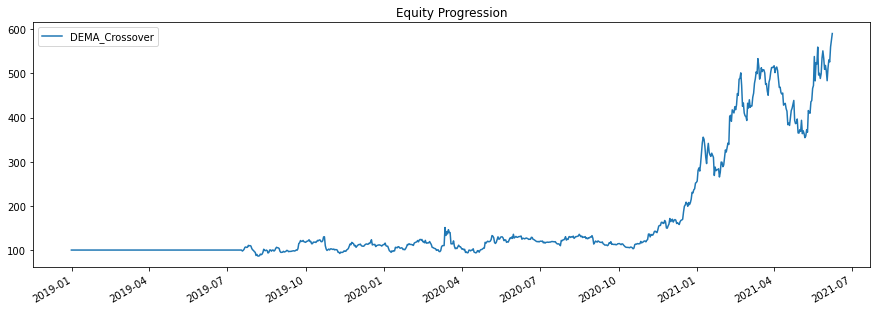

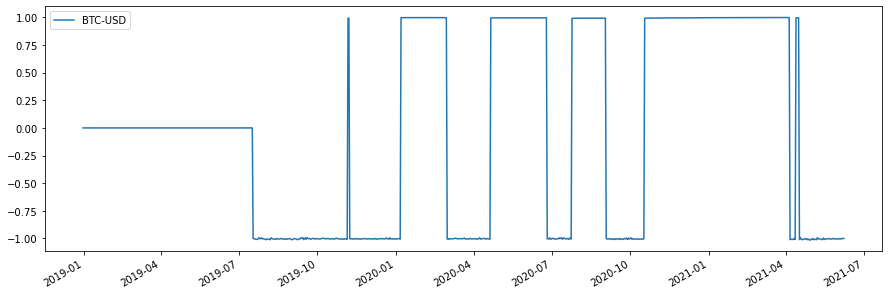

In [15]:
# import Strategies
from methods import get_indicator_signal, plot_bband_dema

"""

Strategy based on own Signals

"""

#Methods work currently only for one asset at a time
asset = 'BTC-USD'

# Specify
start = '01-01-2019'
end = '31-12-2021'

# BBands
t_bbands = 80
nbdevup = 1
nbdevdn = 1

# DEMA
np.arange(5,60, 5)
np.arange(70,250,20)
t_fast = 20
t_slow = 100

# Get Indicators and Signals 
indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

# Plot the data
bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)


""" 

DEMA-Strategy
- Go long if Fast DEMA > Slow DEMA
- Go short if Fast DEMA < Slow DEMA

"""

# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['DEMA'])
target_weight.columns = [asset]

# Create DEMA Strategy

dema_crossover = bt.Strategy('DEMA_Crossover', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

#Create and run Backtest

backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
run = bt.run(backtest)

# Display results
run.plot()
run.display()
run.plot_security_weights()

"""

BBANDS Strategy
- Go long if price goes below Upperband

"""


# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['BBAND'])
target_weight.columns = [asset]


bbands = bt.Strategy('BDands_Crossover_Up', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

backtest = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))

run = bt.run(backtest)

<AxesSubplot:title={'center':'Equity Progression'}>

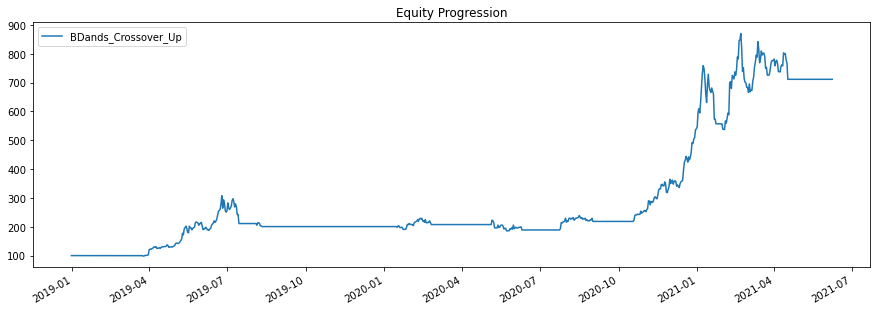

In [16]:
# Display results
run.plot()

In [17]:
run.display()

Stat                 BDands_Crossover_Up
-------------------  ---------------------
Start                2018-12-31
End                  2021-06-08
Risk-free rate       0.00%

Total Return         611.64%
Daily Sharpe         1.53
Daily Sortino        2.66
CAGR                 123.75%
Max Drawdown         -39.55%
Calmar Ratio         3.13

MTD                  0.00%
3m                   -1.03%
6m                   108.73%
YTD                  31.88%
1Y                   258.52%
3Y (ann.)            123.75%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  123.75%

Daily Sharpe         1.53
Daily Sortino        2.66
Daily Mean (ann.)    64.98%
Daily Vol (ann.)     42.54%
Daily Skew           0.88
Daily Kurt           10.20
Best Day             18.70%
Worst Day            -14.06%

Monthly Sharpe       1.57
Monthly Sortino      7.73
Monthly Mean (ann.)  95.80%
Monthly Vol (ann.)   60.86%
Monthly Skew         1.50
Monthly Kurt         1.71
Best Month           58.37%
Worst

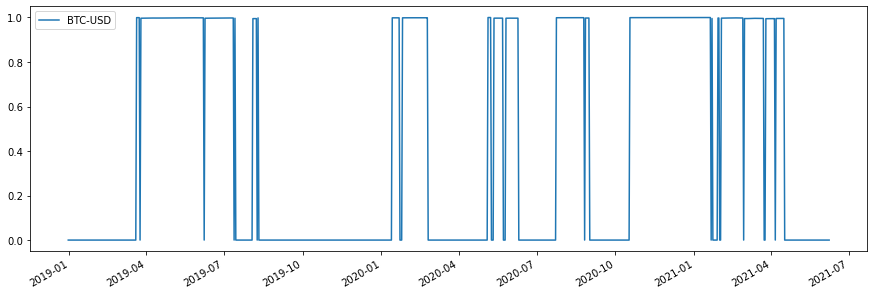

In [18]:
run.plot_security_weights()

In [9]:
indicators

,BTC-USD,Fast_DEMA,Slow_DEMA,RSI,Upperband,Middleband,Lowerband
Date,,,,,,,
2019-01-01,3843.520020,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3943.409424,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,3836.741211,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,3857.717529,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,3845.194580,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-03,36894.406250,35044.841514,49597.163756,39.747264,60441.200184,51930.865820,43420.531457
2021-06-04,35551.957031,34720.327847,49100.475091,37.553050,60349.190418,51665.204004,42981.217590
2021-06-05,35862.378906,34518.538353,48630.122094,38.399873,60198.113070,51377.597559,42557.082047


In [23]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)